In [149]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from matplotlib.path import Path
%matplotlib inline

import re
from collections import defaultdict
from itertools import chain

from visualization_utilities import *
from learning_utilities import *

/oasis/projects/nsf/csd395/yuncong/Brain/utilities/learning_utilities.py:23: SyntaxWarning: import * only allowed at module level
  def export_images_given_patch_addresses(addresses, downscale_factor, fn_template):
/oasis/projects/nsf/csd395/yuncong/Brain/utilities/learning_utilities.py:117: SyntaxWarning: import * only allowed at module level
  def locate_annotated_patches(stack, grid_spec=None, username='yuncong', force=False):
[autoreload of learning_utilities failed: Traceback (most recent call last):
  File "/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
SyntaxError: import * is not allowed in function 'export_images_given_patch_addresses' because it contains a nested function with free variables (learning_utilities.py, line 29)
]
/oasis/projects/nsf/csd395/yuncong/Brain/utilities/learning_utilities.py:23: SyntaxWarning: import * only allowe

In [2]:
sift_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_SIFT_SPM_features'

In [3]:
filenames = defaultdict(list)
train_dir = os.path.join(sift_dir, 'train/MD589')
for fn in os.listdir(train_dir):
    if not fn.endswith('l0.bp'): continue
    res = re.findall('(MD589_([0-9]{4})_(.*?)_histograms)_l0.bp', fn)[0]

    prefix = res[0]
    sec = int(res[1])
    name = res[2]
    
    filenames[name].append((prefix, sec))
    
filenames.default_factory = None

In [4]:
name_to_label = dict(zip(sorted(set(filenames.keys())-{'bg'}), 1+np.arange(len(filenames)-1)))
name_to_label['bg'] = 0
label_to_name = {label: name for name, label in name_to_label.iteritems()}

In [5]:
train_data = []
train_labels = []
train_addresses = []

for name, prefixes in filenames.iteritems():
    print name
    
    n_sample = 1000 / len(prefixes)
    print n_sample, 'samples per section.'
    
    for prefix, sec in sorted(prefixes):
        
        hists0 = bp.unpack_ndarray_file(os.path.join(train_dir, prefix + '_l0.bp'))
        hists1 = bp.unpack_ndarray_file(os.path.join(train_dir, prefix + '_l1.bp'))
        hists2 = bp.unpack_ndarray_file(os.path.join(train_dir, prefix + '_l2.bp'))

        n = hists0.shape[0]
        
        random_indices = np.random.choice(range(n), min(n, n_sample), replace=False)
        n_sampled = len(random_indices)
        
        H = np.c_[hists0[random_indices], 
                  hists1[random_indices].reshape((n_sampled, -1)), 
                  hists2[random_indices].reshape((n_sampled, -1))]

#         H = hists0[random_indices]
        
        train_data.append(H)
        train_labels.append(name_to_label[name]*np.ones(n_sampled, np.int))
        train_addresses.append([('MD589', sec, name, i) for i in random_indices])
        
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)
train_addresses = list(chain(*train_addresses))

n_train = train_data.shape[0]

print train_data.shape
print train_labels.shape

Tz
100 samples per section.
LRt_surround
142 samples per section.
7n
43 samples per section.
5N
100 samples per section.
RtTg
55 samples per section.
Pn
50 samples per section.
VLL
111 samples per section.
7N
55 samples per section.
Amb
333 samples per section.
12N
125 samples per section.
12N_surround
125 samples per section.
R_surround
125 samples per section.
VLL_surround
111 samples per section.
Pn_surround
50 samples per section.
LC_surround
333 samples per section.
bg
29 samples per section.
7N_surround
55 samples per section.
sp5
29 samples per section.
6N_surround
500 samples per section.
sp5_surround
29 samples per section.
Tz_surround
100 samples per section.
5N_surround
100 samples per section.
R
125 samples per section.
LRt
142 samples per section.
RtTg_surround
55 samples per section.
LC
333 samples per section.
AP_surround
250 samples per section.
AP
250 samples per section.
7n_surround
43 samples per section.
6N
500 samples per section.
Amb_surround
333 samples per secti

In [ ]:
{label_to_name[l]: c for l, c in enumerate(np.bincount(train_labels, minlength=len(name_to_label)))}

In [40]:
# Run once
for stack in ['MD589', 'MD594', 'MD585']:
    print stack
    indices_allLandmarks_allSections = locate_annotated_patches(stack, force=True)
    fn = os.path.join(patch_rootdir, '%(stack)s_indices_allLandmarks_allSection.h5' % {'stack':stack})
    indices_allLandmarks_allSections.to_hdf(fn, 'framewise_indices')

/oasis/projects/nsf/csd395/yuncong/Brain/utilities/learning_utilities.py:75: SyntaxWarning: import * only allowed at module level
  def locate_annotated_patches(stack, grid_spec=None, username='yuncong', force=False):
Cannot import mxnet.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD589/0093/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD589/0094/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD589/0095/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD589/0096/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD589/0097/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD5

MD589
49 patches in 7n
122 patches in 5N
83 patches in VLL
129 patches in sp5
512 patches in 7n_surround
608 patches in 5N_surround
535 patches in VLL_surround
2221 patches in sp5_surround
17897 patches in bg
48 patches in 7n
70 patches in 5N
116 patches in VLL
192 patches in sp5
524 patches in 7n_surround
518 patches in 5N_surround
618 patches in VLL_surround
2575 patches in sp5_surround
17683 patches in bg
29 patches in 7N
140 patches in sp5
123 patches in 5N
93 patches in VLL
65 patches in 7n
444 patches in 7N_surround
2176 patches in sp5_surround
616 patches in 5N_surround
555 patches in VLL_surround
529 patches in 7n_surround
17459 patches in bg
89 patches in 7N
158 patches in sp5
234 patches in 5N
21 patches in VLL
47 patches in 7n
574 patches in 7N_surround
1957 patches in sp5_surround
816 patches in 5N_surround
389 patches in VLL_surround
476 patches in 7n_surround
17381 patches in bg
80 patches in 7N
174 patches in sp5
200 patches in 5N
32 patches in VLL
64 patches in 7n
567 p

Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0093/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0094/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0095/ does not exist.
Label GrC on Section 96 is not recognized.
Label VCA on Section 96 is not recognized.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0097/ does not exist.
Label GrC on Section 98 is not recognized.
Label VCA on Section 98 is not recognized.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0099/ does not exist.
Label VCA on Section 100 is not recognized.
Label GrC on Section 100 is not recognized.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped


130 patches in VLL
444 patches in sp5
624 patches in VLL_surround
2457 patches in sp5_surround
16878 patches in bg
5 patches in VLL
402 patches in sp5
319 patches in VLL_surround
2258 patches in sp5_surround
16751 patches in bg
89 patches in 5N
64 patches in VLL
295 patches in sp5
576 patches in 5N_surround
514 patches in VLL_surround
2229 patches in sp5_surround
16424 patches in bg
31 patches in 5N
143 patches in VLL
470 patches in sp5
475 patches in 5N_surround
667 patches in VLL_surround
3134 patches in sp5_surround
16449 patches in bg
58 patches in 7n
4 patches in 5N
65 patches in VLL
231 patches in sp5
502 patches in 7n_surround
303 patches in 5N_surround
536 patches in VLL_surround
2193 patches in sp5_surround
15842 patches in bg
58 patches in 7n
39 patches in 5N
16 patches in VLL
339 patches in sp5
545 patches in 7n_surround
494 patches in 5N_surround
365 patches in VLL_surround
2637 patches in sp5_surround
15873 patches in bg
60 patches in 7n
55 patches in VLL
335 patches in s

Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0363/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD594/0364/ does not exist.
/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['12N', '5N', '6N', '6N_L', '6N_R', '7N', '7N_L', '7N_R', '7n', '7n_R', 'AP', 'Amb', 'LC', 'LC_L', 'LRt', 'Pn', 'R', 'R_L', 'R_R', 'RtTg', 'Tz', 'Tz_R', 'VLL', 'sp5']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
Section 187 has no labelings.


 patches in LC
282 patches in 7N
69 patches in sp5
482 patches in R_L
200 patches in LRt
50 patches in 7n
299 patches in Pn
74 patches in RtTg
862 patches in LC_surround
833 patches in 7N_surround
1020 patches in sp5_surround
954 patches in R_L_surround
944 patches in LRt_surround
470 patches in 7n_surround
800 patches in Pn_surround
597 patches in RtTg_surround
11034 patches in bg
181 patches in LC
284 patches in 7N
62 patches in sp5
197 patches in RtTg
50 patches in 7n
290 patches in Pn
193 patches in LRt
778 patches in LC_surround
847 patches in 7N_surround
973 patches in sp5_surround
702 patches in RtTg_surround
460 patches in 7n_surround
823 patches in Pn_surround
917 patches in LRt_surround
10904 patches in bg
247 patches in 7N
155 patches in LRt
299 patches in Pn
225 patches in LC
52 patches in 7n
815 patches in 7N_surround
902 patches in LRt_surround
877 patches in Pn_surround
824 patches in LC_surround
468 patches in 7n_surround
10714 patches in bg
259 patches in 7N
88 patches

Section 253 has no labelings.
Section 255 has no labelings.


 patches in Tz
81 patches in 7n
506 patches in R_R
161 patches in sp5
398 patches in RtTg
319 patches in Pn
836 patches in Tz_surround
542 patches in 7n_surround
997 patches in R_R_surround
814 patches in sp5_surround
974 patches in RtTg_surround
916 patches in Pn_surround
10851 patches in bg
69 patches in 7n
166 patches in Tz
323 patches in Pn
316 patches in RtTg
519 patches in 7n_surround
814 patches in Tz_surround
932 patches in Pn_surround
904 patches in RtTg_surround
11023 patches in bg
78 patches in 7n
197 patches in Tz
345 patches in Pn
276 patches in RtTg
102 patches in sp5
565 patches in 7n_surround
874 patches in Tz_surround
903 patches in Pn_surround
905 patches in RtTg_surround
979 patches in sp5_surround
10938 patches in bg
61 patches in 7n
166 patches in Tz
345 patches in Pn
249 patches in RtTg
489 patches in 7n_surround
843 patches in Tz_surround
870 patches in Pn_surround
856 patches in RtTg_surround
11311 patches in bg
59 patches in 7n
113 patches in Tz
344 patches in 

Section 261 has no labelings.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0078/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0079/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0080/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0081/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0082/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0083/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped_midbrainIncluded/MD585/0084/ does not exist.
Directory /oasis/projects/nsf/csd395/yuncong/CSHL_dat


54 patches in 7n_L
270 patches in 5N_L
150 patches in VLL
547 patches in 7n_L_surround
864 patches in 5N_L_surround
690 patches in VLL_surround
24594 patches in bg
47 patches in 7n_L
356 patches in 5N
279 patches in VLL
543 patches in 7n_L_surround
991 patches in 5N_surround
901 patches in VLL_surround
24360 patches in bg
54 patches in 7n_L
97 patches in 5N
277 patches in VLL_L
567 patches in 7n_L_surround
725 patches in 5N_surround
906 patches in VLL_L_surround
24862 patches in bg
7 patches in 7n
168 patches in 5N
165 patches in VLL
29 patches in sp5
447 patches in 7n_surround
784 patches in 5N_surround
700 patches in VLL_surround
749 patches in sp5_surround
24272 patches in bg
171 patches in VLL
41 patches in 7N
383 patches in 5N_L
90 patches in sp5
59 patches in LRt
51 patches in 7n
740 patches in VLL_surround
425 patches in 7N_surround
1010 patches in 5N_L_surround
1775 patches in sp5_surround
520 patches in LRt_surround
500 patches in 7n_surround
24315 patches in bg
177 patches i

Section 209 has no labelings.
Section 261 has no labelings.


 patches in 7N
370 patches in Pn
45 patches in 7n_R
43 patches in sp5
922 patches in 7N_surround
976 patches in Pn_surround
515 patches in 7n_R_surround
679 patches in sp5_surround
21211 patches in bg
0 patches in 7n_R
287 patches in Pn
300 patches in 7N_R
249 patches in 7n_R_surround
873 patches in Pn_surround
899 patches in 7N_R_surround
21227 patches in bg
31 patches in 7n_R
214 patches in 7N_R
109 patches in Pn_R
418 patches in 7n_R_surround
845 patches in 7N_R_surround
734 patches in Pn_R_surround
20964 patches in bg
255 patches in 7N
242 patches in Pn
1 patches in 7n_R
827 patches in 7N_surround
800 patches in Pn_surround
268 patches in 7n_R_surround
21490 patches in bg
138 patches in 7N
210 patches in Pn
1 patches in 7n_R
21 patches in sp5
738 patches in 7N_surround
820 patches in Pn_surround
268 patches in 7n_R_surround
688 patches in sp5_surround
21501 patches in bg
32 patches in 7n_R
218 patches in Pn
77 patches in 5N
259 patches in 7N_R
430 patches in 7n_R_surround
800 patch

In [175]:
random_addresses = [train_addresses[i] for i in np.where(train_labels==name_to_label['LC'])[0]][::10]

# random_addresses = [train_addresses[i] for i in np.random.randint(0, n_train, 2)]
# print random_addresses

[('MD589', 175, 'LC', 5), ('MD589', 175, 'LC', 10), ('MD589', 180, 'LC', 83), ('MD589', 180, 'LC', 3), ('MD589', 180, 'LC', 107), ('MD589', 180, 'LC', 61), ('MD589', 180, 'LC', 43), ('MD589', 180, 'LC', 128), ('MD589', 180, 'LC', 11), ('MD589', 180, 'LC', 57), ('MD589', 180, 'LC', 118), ('MD589', 180, 'LC', 37), ('MD589', 180, 'LC', 5), ('MD589', 180, 'LC', 112), ('MD589', 180, 'LC', 50), ('MD589', 180, 'LC', 65), ('MD589', 270, 'LC', 17), ('MD589', 270, 'LC', 63), ('MD589', 270, 'LC', 94), ('MD589', 270, 'LC', 121), ('MD589', 270, 'LC', 31), ('MD589', 270, 'LC', 58), ('MD589', 270, 'LC', 68), ('MD589', 270, 'LC', 78), ('MD589', 270, 'LC', 47), ('MD589', 270, 'LC', 45), ('MD589', 270, 'LC', 22), ('MD589', 270, 'LC', 55)]


In [170]:
name_to_color = dict(zip(name_to_label.keys(), random_colors(len(name_to_label))))

/oasis/projects/nsf/csd395/yuncong/Brain/utilities/learning_utilities.py:118: SyntaxWarning: import * only allowed at module level
  
Cannot import mxnet.
Cannot import mxnet.
Cannot import mxnet.


In [177]:
export_images_given_patch_addresses(random_addresses, downscale_factor=8,
                                    fn_template='/home/yuncong/csd395/CSHL_data_patches/viz/%(stack)s_%(sec)04d_train.jpg',
                                   name_to_color=name_to_color)

Cannot import mxnet.
Cannot import mxnet.
Cannot import mxnet.


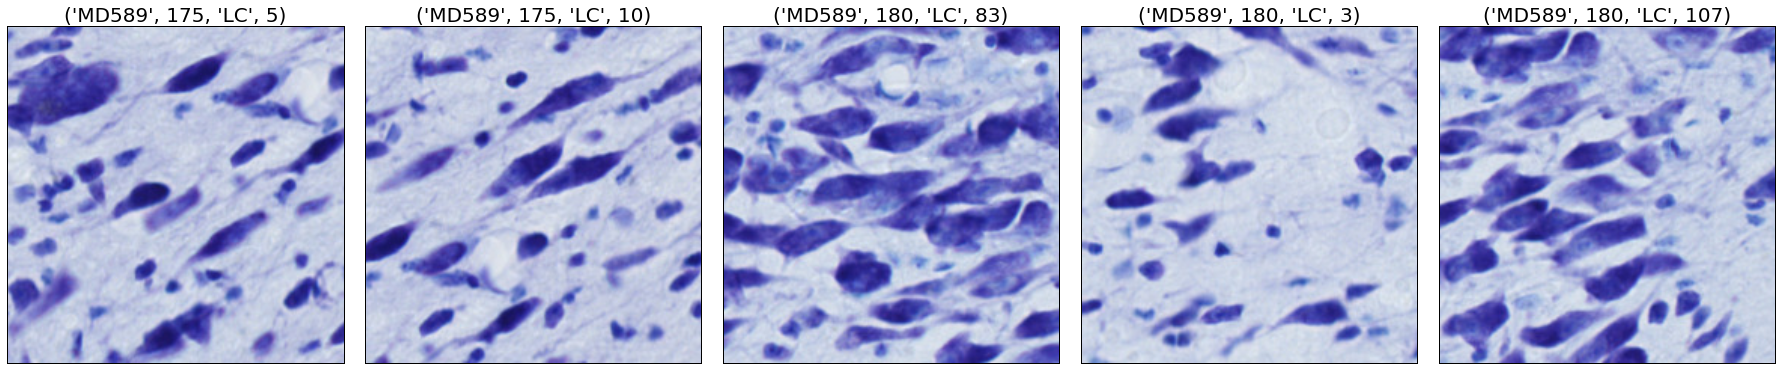

In [195]:
patches = extract_patches_given_addresses(random_addresses[:5])
display_images_in_grids(patches, nc=5, titles=[(stack,sec,name,i) for stack, sec, name, i in random_addresses[:5]])

In [ ]:
# # build training data

# sift_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_SIFT_SPM_features'

# train_data = []
# train_labels = []

# n_sample = 1000

# for name in labels[1:]:
#     train_hists0 = bp.unpack_ndarray_file(sift_dir + '/train/MD589/MD589_%(name)s_histograms_l0.bp' % {'name': name})
#     train_hists1 = bp.unpack_ndarray_file(sift_dir + '/train/MD589/MD589_%(name)s_histograms_l1.bp' % {'name': name})
#     train_hists2 = bp.unpack_ndarray_file(sift_dir + '/train/MD589/MD589_%(name)s_histograms_l2.bp' % {'name': name})
    
#     n_train = train_hists0.shape[0]

#     #     train_hists = np.c_[train_hists0, train_hists1.reshape((n_train, -1)), train_hists2.reshape((n_train, -1))]

#     random_indices = np.random.choice(range(n_train), min(n_train, n_sample), replace=False)
#     n_train = len(random_indices)
#     train_hists = np.c_[train_hists0[random_indices], 
#                         train_hists1[random_indices].reshape((n_train, -1)), 
#                         train_hists2[random_indices].reshape((n_train, -1))]
    
#     train_data.append(train_hists)
#     train_labels.append(np.ones((n_train, )) * labels_index[name])

# train_data = np.concatenate(train_data)
# train_labels = np.concatenate(train_labels)
# n_train = train_data.shape[0]
    
# print train_data.shape

In [7]:
train_data_normalized = train_data / train_data.sum(axis=1)[:,None].astype(np.float)

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [ ]:
# build testing data

stack = 'MD585'

first_detect_sec, last_detect_sec = detect_bbox_range_lookup[stack]

sec = first_detect_sec

test_hists0 = bp.unpack_ndarray_file(sift_dir + '/%(stack)s/%(stack)s_%(sec)04d_roi1_histograms_l0.bp' % {'stack': stack, 'sec': sec})
test_hists1 = bp.unpack_ndarray_file(sift_dir + '/%(stack)s/%(stack)s_%(sec)04d_roi1_histograms_l1.bp' % {'stack': stack, 'sec': sec})
test_hists2 = bp.unpack_ndarray_file(sift_dir + '/%(stack)s/%(stack)s_%(sec)04d_roi1_histograms_l2.bp' % {'stack': stack, 'sec': sec})

n_test = test_hists0.shape[0]
test_hists = np.c_[test_hists0, test_hists1.reshape((n_test, -1)), test_hists2.reshape((n_test, -1))]

test_data = test_hists

In [ ]:
test_data.shape

In [ ]:
test_data_normalized = test_data / test_data.sum(axis=1)[:,None].astype(np.float)

In [8]:
# method 1
t = time.time()

def compute_intersection_kernel_oneJob(i, j1):
#     dist = .5 * np.sum(train_data_normalized + h - np.abs(train_data_normalized - h), axis=1)
    dist = np.minimum(train_data_normalized[i], train_data_normalized[j1:]).sum(axis=1)
    return dist

train_dist_triangle = np.concatenate(Parallel(n_jobs=8)(delayed(compute_intersection_kernel_oneJob)(i, i) 
                                     for i in range(n_train)))

sys.stderr.write('compute intersection kernel: %f seconds\n' % (time.time() - t)) # ~ 200s / 12k training data

train_dist_mat = np.empty((n_train, n_train))
train_dist_mat[np.triu_indices(n_train)] = train_dist_triangle
r = np.tril_indices(n_train)
train_dist_mat[r] = train_dist_mat.T[r]

KeyboardInterrupt: 

In [ ]:
# method 2
t = time.time()

def compute_intersection_kernel_oneJob(h):
#     dist = .5 * np.sum(train_data_normalized + h - np.abs(train_data_normalized - h), axis=1)
    dist = np.minimum(train_data_normalized, h).sum(axis=1)
    return dist

# train_dist_mat = np.array(Parallel(n_jobs=16)(delayed(compute_intersection_kernel_oneJob)(h) 
#                                      for h in train_data_normalized[:1000]))

sys.stderr.write('compute intersection kernel: %f seconds\n' % (time.time() - t)) # ~ 400s / 12k training data

In [ ]:
# method 3
t = time.time()

def compute_intersection_kernel_oneJob(i, ni, j, nj):
    dists = np.minimum(train_data_normalized[i:i+ni, None], train_data_normalized[j:j+nj]).sum(axis=-1)
    return dists

train_dist_mat = np.empty((n_train, n_train))
ni = 100
nj = 100
for j in range(0, n_train, nj):
    train_dist_mat[:, j:j+nj] = np.concatenate(Parallel(n_jobs=16)(delayed(compute_intersection_kernel_oneJob)(i, ni, j, nj) 
                                                    for i in range(0, n_train, ni)))

sys.stderr.write('compute intersection kernel: %f seconds\n' % (time.time() - t)) # ~ 400s / 12k training data

In [ ]:
bp.pack_ndarray_file(train_dist_mat, sift_dir + '/train/train_spm_dist_mat.bp')

In [ ]:
class Hypersphere_abstain:
    
    def __init__(self, histogram, threshold, label, alpha, size, acc, index, 
                 unweighted_acc, label_distribution, neighbor_indices):
        
        self.h = histogram
        self.t = threshold
        self.l = label
        self.alpha = alpha
        self.size = size
        self.acc = acc # Weighted accuracy
        self.index = index
        self.unweighted_acc = unweighted_acc
        self.label_distribution = label_distribution
        self.neighbor_indices = neighbor_indices        

In [ ]:
# Adaboost.M2

n_train = train_data.shape[0]

D = 1./ n_train * np.ones((n_train, ))

W = np.ones((n_train, ))

# choose exemplar

# compute accuracy of exemplar

# choose the plurality

# compute threshold

# reweight samples

# store hypersphere


